In [ ]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive

**Exercise 17.12**

The displacement $u = u(x, t)$ of an infinitely long string is governed by the wave equation

$$\frac{\partial^{2} u}{\partial t^{2}} = 4 \frac{\partial^{2} u}{\partial x^{2}}, \quad -\infty<x<\infty, \quad t>0.$$

At time $t = 0$ an initial signal is given of the form

$$
u(x,0)=f(x)=
\begin{cases}
    x , & 0<x<1, \\
    -x+2, & 1<x<2, \\
    0, & \text{othewise},
\end{cases}
$$

$$\frac{\partial u}{\partial t}(x,0)=0, \quad -\infty<x<\infty.$$


The solution is 
$$
u(x,t) = \frac{1}{2}[f(x+2t)-f(x-2t)].
$$

Let's explore the solutions graphically.

First, let's define the function $f(x)$ and the solution $u(x,t)$.


In [2]:
def f(x):
    cond = [(0 < x) &  (x <= 1), (1 < x) & (x < 2)]
    value = [lambda x: x, lambda x: -x + 2]
    return np.piecewise(x, cond, value)
    
def u(x,t):
    return 1/2*(f(x + 2*t) + f(x - 2*t))

Now let's plot the solution in a three dimensional plot

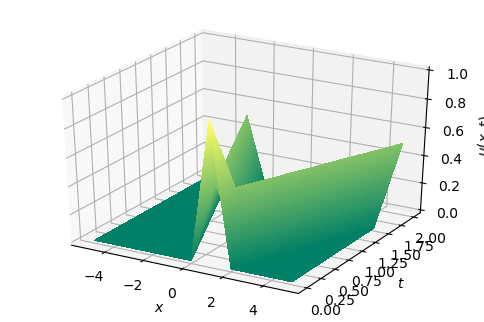

In [3]:
# We need to create a mesh
X = np.arange(-5, 5, 0.01)
T = np.arange(0, 2, 0.01)
X, T = np.meshgrid(X, T)
# and evaluate the solution in this mesh
U = u(X, T)
fig = plt.figure(dpi=100)
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, T, U,
                       cmap='summer',
                       rstride=1, cstride=1,
                       alpha=None, antialiased=False)
ax.set_xlabel("$x$")
ax.set_ylabel("$t$")
ax.set_zlabel("$u(x,t)$")
plt.show()

This looks really cool but I still don't understand what is going on.

Let's see what happens to the characteristics, which are lines in the $xt$-plane. They are given by the lines
$$a=x+2t,$$
and
$$a=x-2t.$$

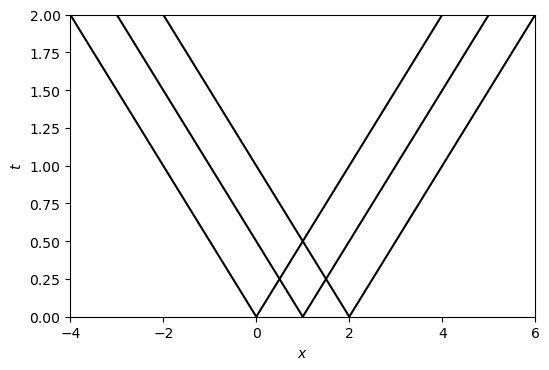

In [4]:
def charac1(x, a):
    return a/2 - x/2
def charac2(x, a):
    return -a/2 + x/2
X = np.arange(-5, 6, 0.01)
fig = plt.figure(dpi=100)
plt.plot(X, charac1(X, 0), 'k-')
plt.plot(X, charac1(X, 1), 'k-')
plt.plot(X, charac1(X, 2), 'k-')
plt.plot(X, charac2(X, 0), 'k-')
plt.plot(X, charac2(X, 1), 'k-')
plt.plot(X, charac2(X, 2), 'k-')
plt.xlim((-4,6))
plt.ylim((0,2))
plt.xlabel("$x$")
plt.ylabel("$t$")
plt.show()

We only plotted those characteristics where there is a change in the definition of $u(x,t)$ since

$$
u(x,t) = \frac{1}{2}[f(x+2t)-f(x-2t)].
$$
where
$$
f(x+2t)=
\begin{cases}
    x+2t , & 0<x+2t<1, \\
    -x+2t+2, & 1<x+2t<2, \\
    0, & \text{othewise},
\end{cases}
$$
and
$$
f(x-2t)=
\begin{cases}
    x-2t , & 0<x-2t<1, \\
    -(x-2t)+2, & 1<x-2t<2, \\
    0, & \text{othewise}.
\end{cases}
$$
That is, we only plotted those characteristics
$$a=x+2t, \quad a=x-2t,$$
for $a=0$, $1$, and $2$.

If we take a snapshot of the solution $u(x,t)$ at time $t$ we can plot the $u(x,t)$ versus $x$.

In [5]:
def sol_plot_fixed_t(t):
    X = np.arange(-5, 6, 0.01)
    fig = plt.figure(dpi=100)
    plt.plot(X, u(X, t), 'b-')
    plt.xlim((-4,6))
    plt.ylim((0,1))
    plt.xlabel("$x$")
    plt.ylabel("$u(x,t)$")
    plt.show()

interactive_plot = interactive(sol_plot_fixed_t, t=(0, 1, 0.01))
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='t', max=1.0, step=0.01), Output()), _dom_classes=('w…

Can you see the two hats spliting from the inital condition and taking opposite ways? 

So, really what is going on with the solution is that the initial condition $f(x)$ is splitting into two equal parts which travel at the same speed, $c=2$, in opposite directions.

Let's put the plot of characteristics together with the plot of the solution versus $x$. The current time (snapshot) is indicated over the plot of characteristics with a blue horizontal line, and the two separeate travelling waves ($\tfrac{1}{2}f(x+ct)$ and $\tfrac{1}{2}f(x-ct)$) are explicit plotted in dashed lines.

In [6]:
def sol_plot_fixed_t(t):
    X = np.arange(-5, 6, 0.01)
    fig = plt.figure(dpi=100)
    # Plot of Charachteristics
    plt.subplot(2, 1, 1)
    plt.plot(X, charac1(X, 0), 'k-')
    plt.plot(X, charac1(X, 1), 'k-')
    plt.plot(X, charac1(X, 2), 'k-')
    plt.plot(X, charac2(X, 0), 'k-')
    plt.plot(X, charac2(X, 1), 'k-')
    plt.plot(X, charac2(X, 2), 'k-')
    plt.plot(X, 0*X+t, 'b-')
    plt.xlim((-4,6))
    plt.ylim((0,1))
    plt.xlabel(None)
    plt.ylabel("$t$")
    plt.xticks([])
    # Plot of solution versus x
    plt.subplot(2, 1, 2)
    plt.plot(X, u(X, t), 'b-')
    plt.plot(X, 0.5*f(X + 2*t), 'b--')
    plt.plot(X, 0.5*f(X - 2*t), 'b--')
    plt.xlim((-4,6))
    plt.ylim((0,1))
    plt.xlabel("$x$")
    plt.ylabel("$u(x,t)$")
#     # 3d plot
#     T = np.arange(0, t, 0.1)
#     X, T = np.meshgrid(X, T)
#     U = u(X, T)
#     ax1 = plt.subplot(122, projection='3d')
#     surf = ax1.plot_surface(X, T, U,
#                            cmap='summer',
#                            rstride=1, cstride=1,
#                            alpha=None, antialiased=False)
#     ax1.set_xlabel("$x$")
#     ax1.set_ylabel("$t$")
#     ax1.set_zlabel("$u(x,t)$")
#     plt.ylim((0,1))
#     plt.xlim((-4,6))
    plt.show()

interactive_plot = interactive(sol_plot_fixed_t, t=(0, 1, 0.01))
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='t', max=1.0, step=0.01), Output()), _dom_classes=('w…